In [62]:
# Import Libraries

from statsbombpy import sb

## Math Operations
import numpy as np
import math

## Data Preprocessing
import pandas as pd

## Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import get_cmap
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.colors import to_rgba
from matplotlib import rcParams
import seaborn as sns
import networkx as nx
from PIL import Image
from highlight_text import ax_text, fig_text
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, VerticalPitch, add_image, FontManager, Sbopen
import mplsoccer
from svgpathtools import svg2paths
from svgpath2mpl import parse_path

## Requests and downloads
import tqdm
import requests
from urllib.request import urlopen

## Filter warning
from warnings import filterwarnings
filterwarnings('ignore')

In [63]:
# Load fonts
URL = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
URL2 = 'https://github.com/google/fonts/blob/main/apache/roboto/static/Roboto-Bold.ttf?raw=true'
robotto_regular = FontManager(URL)
robboto_bold = FontManager(URL2)

In [64]:
# get event dataframe for game 3795506
parser = Sbopen()
df, related, freeze, tactics = parser.event(3795506)

In [65]:
team1, team2 = df.team_name.unique()
df_team_ITA = (df.team_name == team1)
df_team_ENG = (df.team_name == team2)

In [66]:
# get player name and ID
df_players_Italy = df.loc[df_team_ITA, ['player_name', 'player_id', 'minute']]
df_players_Italy_g = df_players_Italy.groupby('player_name')[['player_id']].apply(lambda x: list(np.unique(x)))
df_players_Italy_g

player_name
Alessandro Florenzi             [6964.0]
Andrea Belotti                  [7471.0]
Bryan Cristante                 [6993.0]
Ciro Immobile                   [7788.0]
Domenico Berardi                [7131.0]
Emerson Palmieri dos Santos     [4355.0]
Federico Bernardeschi           [7777.0]
Federico Chiesa                 [7156.0]
Gianluigi Donnarumma            [7036.0]
Giorgio Chiellini               [6954.0]
Giovanni Di Lorenzo            [11514.0]
Jorge Luiz Frello Filho         [7024.0]
Leonardo Bonucci                [7173.0]
Lorenzo Insigne                 [7037.0]
Manuel Locatelli                [7038.0]
Marco Verratti                  [3166.0]
Nicolò Barella                  [8181.0]
dtype: object

In [67]:
# get event data for game 3795506 for all Starting XI italian players

df_Donnarumma = parser.event(3795506)[0]  # 0 index is the event file
df_Donnarumma = df_Donnarumma.loc[df_Donnarumma .player_id == 7036, ['x', 'y']]

df_DiLorenzo = parser.event(3795506)[0]  # 0 index is the event file
df_DiLorenzo = df_DiLorenzo.loc[df_DiLorenzo.player_id == 11514, ['x', 'y']]

df_Bonucci = parser.event(3795506)[0]  # 0 index is the event file
df_Bonucci = df_Bonucci.loc[df_Bonucci.player_id == 7173, ['x', 'y']]

df_Chiellini = parser.event(3795506)[0]  # 0 index is the event file
df_Chiellini = df_Chiellini.loc[df_Chiellini.player_id == 6954, ['x', 'y']]

df_Emerson = parser.event(3795506)[0]  # 0 index is the event file
df_Emerson = df_Emerson.loc[df_Emerson.player_id == 4355, ['x', 'y']]

df_Barella = parser.event(3795506)[0]  # 0 index is the event file
df_Barella = df_Barella.loc[df_Barella.player_id == 8181, ['x', 'y']]

df_Jorgihno = parser.event(3795506)[0]  # 0 index is the event file
df_Jorgihno = df_Jorgihno.loc[df_Jorgihno.player_id == 7024, ['x', 'y']]

df_Verratti = parser.event(3795506)[0]  # 0 index is the event file
df_Verratti = df_Verratti.loc[df_Verratti.player_id == 3166, ['x', 'y']]

df_Chiesa = parser.event(3795506)[0]  # 0 index is the event file
df_Chiesa = df_Chiesa.loc[df_Chiesa.player_id == 7156, ['x', 'y']]

df_Insigne = parser.event(3795506)[0]  # 0 index is the event file
df_Insigne = df_Insigne.loc[df_Insigne.player_id == 7037, ['x', 'y']]

df_Immobile = parser.event(3795506)[0]  # 0 index is the event file
df_Immobile = df_Immobile.loc[df_Immobile.player_id == 7788, ['x', 'y']]

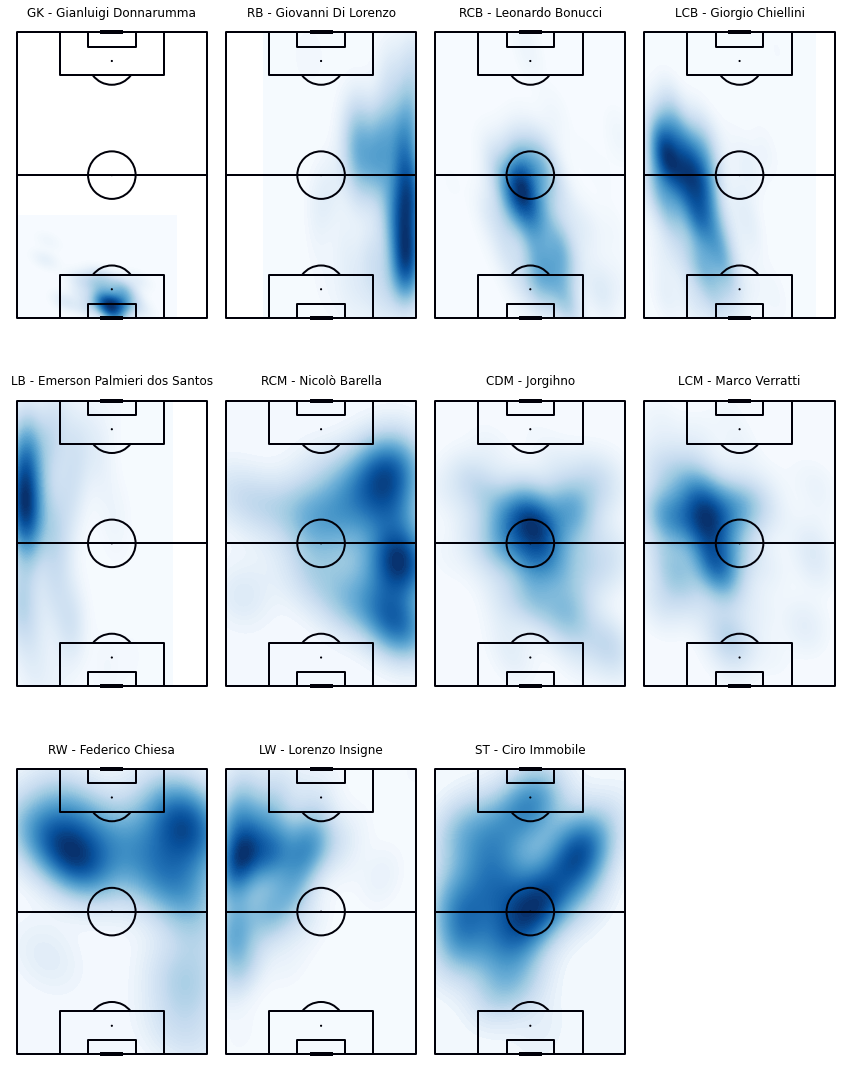

In [79]:
#ax is a 3x4 matrix
f, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (15,20))

#1 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[0][0])
kde_after = pitch.kdeplot(x = df_Donnarumma.x, 
                          y = df_Donnarumma.y, 
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, cmap='Blues',
                          ax = ax[0][0])
ax[0][0].set_title('GK - Gianluigi Donnarumma')

#2 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[0][1])
kde_after = pitch.kdeplot(x = df_DiLorenzo.x, 
                          y = df_DiLorenzo.y,
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, 
                          cmap='Blues',
                         ax = ax[0][1])
ax[0][1].set_title('RB - Giovanni Di Lorenzo')


#3 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[0][2])
kde_after = pitch.kdeplot(x = df_Bonucci.x, 
                          y = df_Bonucci.y,
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, 
                          cmap='Blues',
                         ax = ax[0][2])
ax[0][2].set_title('RCB - Leonardo Bonucci')

#4 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[0][3])
kde_after = pitch.kdeplot(x = df_Chiellini.x, 
                          y = df_Chiellini.y,
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, 
                          cmap='Blues',
                         ax = ax[0][3])
ax[0][3].set_title('LCB - Giorgio Chiellini')

#5 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[1][0])
kde_after = pitch.kdeplot(x = df_Emerson.x, 
                          y = df_Emerson.y, 
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, cmap='Blues',
                          ax = ax[1][0])
ax[1][0].set_title('LB - Emerson Palmieri dos Santos')

#6 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[1][1])
kde_after = pitch.kdeplot(x = df_Barella.x, 
                          y = df_Barella.y,
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, 
                          cmap='Blues',
                         ax = ax[1][1])
ax[1][1].set_title('RCM - Nicolò Barella')


#7 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[1][2])
kde_after = pitch.kdeplot(x = df_Jorgihno.x, 
                          y = df_Jorgihno.y,
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, 
                          cmap='Blues',
                         ax = ax[1][2])
ax[1][2].set_title('CDM - Jorgihno')

#8 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[1][3])
kde_after = pitch.kdeplot(x = df_Verratti.x, 
                          y = df_Verratti.y,
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, 
                          cmap='Blues',
                         ax = ax[1][3])
ax[1][3].set_title('LCM - Marco Verratti')

#9 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[2][0])
kde_after = pitch.kdeplot(x = df_Chiesa.x, 
                          y = df_Chiesa.y, 
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, cmap='Blues',
                          ax = ax[2][0])
ax[2][0].set_title('RW - Federico Chiesa')

#10 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[2][1])
kde_after = pitch.kdeplot(x = df_Insigne.x, 
                          y = df_Insigne.y,
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, 
                          cmap='Blues',
                         ax = ax[2][1])
ax[2][1].set_title('LW - Lorenzo Insigne')


#11 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[2][2])
kde_after = pitch.kdeplot(x = df_Immobile.x, 
                          y = df_Immobile.y,
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, 
                          cmap='Blues',
                         ax = ax[2][2])
ax[2][2].set_title('ST - Ciro Immobile')

f.delaxes(ax[2][3])

plt.subplots_adjust(wspace = 0., hspace = 0.05)

#plt.show()
plt.savefig("ITA_heatmaps.jpg", bbox_inches = 'tight')

In [60]:
# get player name and ID
df_players_England = df.loc[df_team_ENG, ['player_name', 'player_id', 'minute']]
df_players_England_g = df_players_England.groupby('player_name')[['player_id']].apply(lambda x: list(np.unique(x)))
df_players_England_g

player_name
Bukayo Saka               [22084.0]
Declan Rice                [3943.0]
Harry Kane                [10955.0]
Harry Maguire              [3336.0]
Jack Grealish              [9638.0]
Jadon Sancho              [12423.0]
John Stones                [3244.0]
Jordan Brian Henderson     [3532.0]
Jordan Pickford            [3468.0]
Kalvin Phillips            [4706.0]
Kieran Trippier            [3308.0]
Kyle Walker                [3205.0]
Luke Shaw                  [3382.0]
Marcus Rashford            [3318.0]
Mason Mount                [7843.0]
Raheem Sterling            [3233.0]
dtype: object

In [80]:
# get event data for game 3795506 for all Starting XI english players

df_Pickford = parser.event(3795506)[0]  # 0 index is the event file
df_Pickford = df_Pickford.loc[df_Pickford .player_id == 3468, ['x', 'y']]

df_Walker = parser.event(3795506)[0]  # 0 index is the event file
df_Walker = df_Walker.loc[df_Walker.player_id == 3205, ['x', 'y']]

df_Stones = parser.event(3795506)[0]  # 0 index is the event file
df_Stones = df_Stones.loc[df_Stones.player_id == 3244, ['x', 'y']]

df_Maguire = parser.event(3795506)[0]  # 0 index is the event file
df_Maguire = df_Maguire.loc[df_Maguire.player_id == 3336, ['x', 'y']]

df_Trippier = parser.event(3795506)[0]  # 0 index is the event file
df_Trippier = df_Trippier.loc[df_Trippier.player_id == 3308, ['x', 'y']]

df_Phillips = parser.event(3795506)[0]  # 0 index is the event file
df_Phillips = df_Phillips.loc[df_Phillips.player_id == 4706, ['x', 'y']]

df_Rice = parser.event(3795506)[0]  # 0 index is the event file
df_Rice = df_Rice.loc[df_Rice.player_id == 3943, ['x', 'y']]

df_Shaw = parser.event(3795506)[0]  # 0 index is the event file
df_Shaw = df_Shaw.loc[df_Shaw.player_id == 3382, ['x', 'y']]

df_Mount = parser.event(3795506)[0]  # 0 index is the event file
df_Mount = df_Mount.loc[df_Mount.player_id == 7843, ['x', 'y']]

df_Sterling = parser.event(3795506)[0]  # 0 index is the event file
df_Sterling = df_Sterling.loc[df_Sterling.player_id == 3233, ['x', 'y']]

df_Kane = parser.event(3795506)[0]  # 0 index is the event file
df_Kane = df_Kane.loc[df_Kane.player_id == 10955, ['x', 'y']]

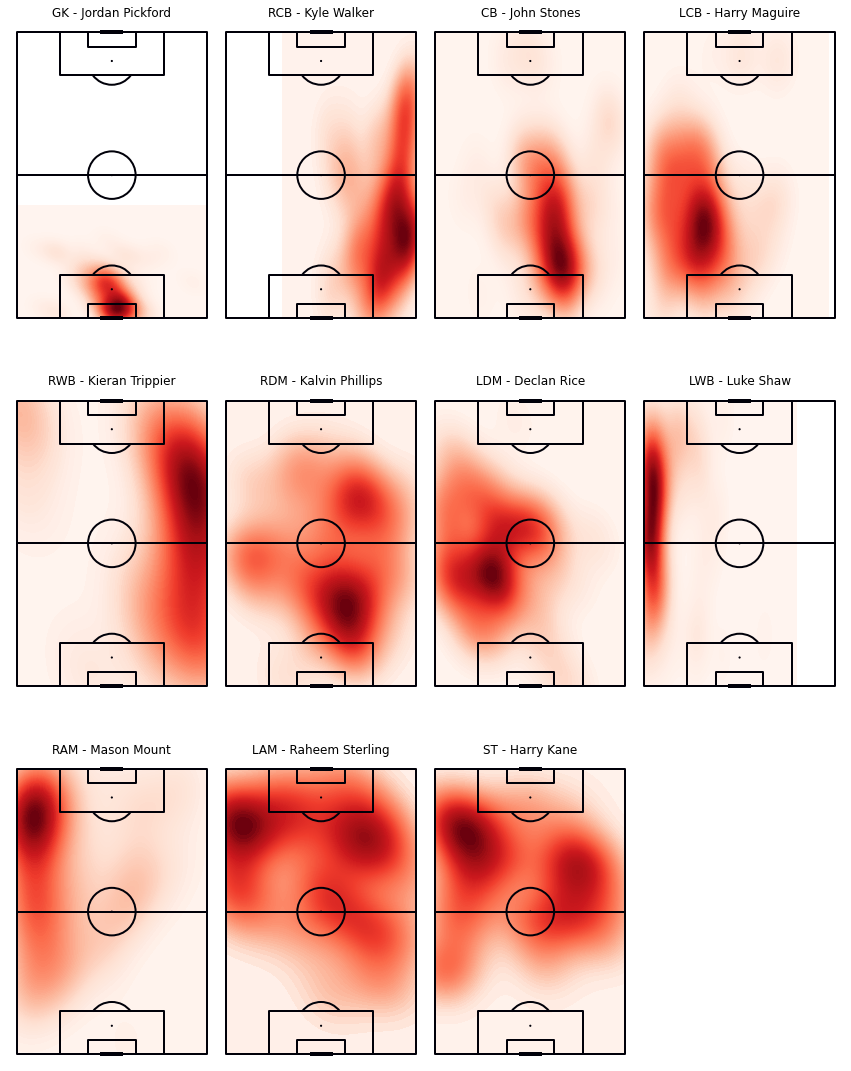

In [82]:
#ax is a 3x4 matrix
f, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (15,20))

#1 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[0][0])
kde_after = pitch.kdeplot(x = df_Pickford.x, 
                          y = df_Pickford.y, 
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, 
                          cmap='Reds',
                          ax = ax[0][0])
ax[0][0].set_title('GK - Jordan Pickford')

#2 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[0][1])
kde_after = pitch.kdeplot(x = df_Walker.x, 
                          y = df_Walker.y,
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, 
                          cmap='Reds',
                         ax = ax[0][1])
ax[0][1].set_title('RCB - Kyle Walker')


#3 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[0][2])
kde_after = pitch.kdeplot(x = df_Stones.x, 
                          y = df_Stones.y,
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, 
                          cmap='Reds',
                         ax = ax[0][2])
ax[0][2].set_title('CB - John Stones')

#4 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[0][3])
kde_after = pitch.kdeplot(x = df_Maguire.x, 
                          y = df_Maguire.y,
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, 
                          cmap='Reds',
                         ax = ax[0][3])
ax[0][3].set_title('LCB - Harry Maguire')

#5 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[1][0])
kde_after = pitch.kdeplot(x = df_Trippier.x, 
                          y = df_Trippier.y, 
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, 
                          cmap='Reds',
                          ax = ax[1][0])
ax[1][0].set_title('RWB - Kieran Trippier')

#6 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[1][1])
kde_after = pitch.kdeplot(x = df_Phillips.x, 
                          y = df_Phillips.y,
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, 
                          cmap='Reds',
                         ax = ax[1][1])
ax[1][1].set_title('RDM - Kalvin Phillips')


#7 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[1][2])
kde_after = pitch.kdeplot(x = df_Rice.x, 
                          y = df_Rice.y,
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, 
                          cmap='Reds',
                         ax = ax[1][2])
ax[1][2].set_title('LDM - Declan Rice')

#8 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[1][3])
kde_after = pitch.kdeplot(x = df_Shaw.x, 
                          y = df_Shaw.y,
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, 
                          cmap='Reds',
                         ax = ax[1][3])
ax[1][3].set_title('LWB - Luke Shaw')

#9 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[2][0])
kde_after = pitch.kdeplot(x = df_Mount.x, 
                          y = df_Mount.y, 
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, 
                          cmap='Reds',
                          ax = ax[2][0])
ax[2][0].set_title('RAM - Mason Mount')

#10 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[2][1])
kde_after = pitch.kdeplot(x = df_Sterling.x, 
                          y = df_Sterling.y,
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, 
                          cmap='Reds',
                         ax = ax[2][1])
ax[2][1].set_title('LAM - Raheem Sterling')


#11 graph
pitch = VerticalPitch(pitch_type = 'statsbomb', line_color='#000009', line_zorder=2)

pitch.draw(ax = ax[2][2])
kde_after = pitch.kdeplot(x = df_Kane.x, 
                          y = df_Kane.y,
                          shade=True, 
                          levels=100, 
                          shade_lowest=True,
                          cut=4, 
                          cmap='Reds',
                         ax = ax[2][2])
ax[2][2].set_title('ST - Harry Kane')

f.delaxes(ax[2][3])

plt.subplots_adjust(wspace = 0., hspace = 0.05)

#plt.show()
plt.savefig("ENG_heatmaps.jpg", bbox_inches = 'tight')